# Tu primer árbol de decisión con scikit-learn

In [48]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [49]:
#Cargamos dataset a utilizar
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

## Exploración de datos

In [50]:
#Visualizacion del DataFrame
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [51]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name','Fare']
df.drop(columns_to_drop, axis='columns', inplace=True)

In [52]:
#Renombramos las columnas
df.columns = ['Survived', 'Pclas', 'Sex','Age','SibSp','Parch']
df.head()


,Survived,Pclas,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [53]:
#Analizamos el shape del objeto
print(df.shape)

(887, 6)


In [54]:
#Visualizamos los tipos de datos
df.dtypes

Survived      int64
Pclas         int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [55]:
#Cambiamos los tipos de datos
df = pd.get_dummies(df, columns = ['Sex'], drop_first=True)

In [56]:
df.dtypes

Survived      int64
Pclas         int64
Age         float64
SibSp         int64
Parch         int64
Sex_male      uint8
dtype: object

In [57]:
df.head()

,Survived,Pclas,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,1
1,1,1,38.0,1,0,0
2,1,3,26.0,0,0,0
3,1,1,35.0,1,0,0
4,0,3,35.0,0,0,1


In [58]:
#Reemplazar el DataFrame
df.rename(columns={'Sex_male':'Sex'}, inplace=True)


In [59]:
#Ordenar columnas por nombres
df = df[['Survived','Pclas','Sex','Age','SibSp','Parch']]
df.head()


,Survived,Pclas,Sex,Age,SibSp,Parch
0,0,3,1,22.0,1,0
1,1,1,0,38.0,1,0
2,1,3,0,26.0,0,0
3,1,1,0,35.0,1,0
4,0,3,1,35.0,0,0


## Entrenamiento de árbol de decisión con scikit-learn

In [60]:
#Separamos en X e y
X = df.drop('Survived', axis=1)
y = df['Survived']


In [61]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split


#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [62]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier


#Creacion del modelo
dtree = DecisionTreeClassifier(max_depth=2, random_state=101) # Tiende a sobreajustarse, entonces como tenemos pocos datos le ponemos poca profundidad


In [63]:
#Entrenamiento
dtree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=2, random_state=101)

## Evaluación del modelo

In [64]:
#Calculo de las predicciones en Train y Test
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test) # Buena práctica para comparar la performa del modelo


In [65]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score


#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)



#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy en Train:', train_accuracy)
print('Accuracy en Test:', test_accuracy)

# Si las metricas de train y test son parecidads, el modelo esta bien entrenado, si no, esta sobreajustado


Accuracy en Train: 0.7935483870967742
Accuracy en Test: 0.7677902621722846


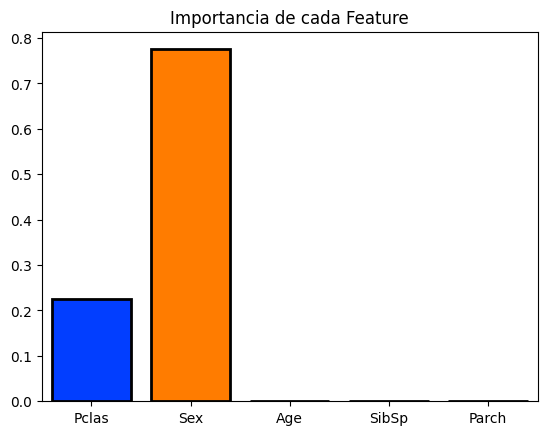

In [66]:
#Verificamos el feature importances
import seaborn as sns

importances = dtree.feature_importances_
columns = X.columns
data = pd.DataFrame([importances], columns=columns)

sns.barplot(
    data, palette='bright', saturation=2.0, edgecolor='black', linewidth=2
)
plt.title('Importancia de cada Feature')
plt.show()


**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 